In [2]:
from pprint import pprint

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import seaborn as sns

In [3]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
sorted_venue_df = pd.read_csv("../function_data/sorted_venue.csv")

### 日付, 時間の型を変える, 曜日を追加する

In [4]:
train_feature  = pd.to_datetime(train_df["match_date"]).dt.weekday
train_feature

0       5
1       6
2       6
3       6
4       6
       ..
3667    5
3668    5
3669    5
3670    5
3671    5
Name: match_date, Length: 3672, dtype: int64

In [38]:
train_df["match_date"] = pd.to_datetime(train_df["match_date"])
train_df["kick_off_time"] = pd.to_datetime(train_df["kick_off_time"]).dt.hour
train_df["match_weekday"] = pd.to_datetime(train_df["match_date"]).dt.weekday
test_df["match_date"] = pd.to_datetime(test_df["match_date"])
test_df["kick_off_time"] = pd.to_datetime(test_df["kick_off_time"]).dt.hour
test_df["match_weekday"] = pd.to_datetime(test_df["match_date"]).dt.weekday

#### スタジアムのラベルエンコーディング

In [39]:
sorted_venue_mapping = {col: idx for idx, col in enumerate(sorted_venue_df["venue"])}
# pprint(sorted_                                                                                                                                                                                                                                                                                                                                                                                    venue_mapping)

In [40]:
train_df["venue_label"] = train_df["venue"].map(sorted_venue_mapping)
test_df["venue_label"] = test_df["venue"].map(sorted_venue_mapping)
# train_df[["venue", "venue_label"]]

##### 気温の標準化

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_df[["temperature"]])
train_df["temperature"] = sc.transform(train_df[["temperature"]])
test_df["temperature"] = sc.transform(test_df[["temperature"]])

#### 天気のラベルエンコーディング

In [42]:
weather_list = ['雷雨のち曇', '曇一時雷雨のち雨', '曇のち雷雨', '雨一時雷雨', '曇一時雷雨のち曇', '曇のち雨一時雷', '雪', '晴のち雪', '曇時々雪', '雨', '雨のち曇時々雨', '雨のち曇のち雨', '雨時々曇', '雨一時曇のち雨', '雨のち曇', '雨のち曇一時雨', '曇のち雨', '曇のち雨のち曇', '曇のち雨のち晴', '曇のち雨のち屋内', '雨一時曇', '雨のち晴', '雨のち曇のち晴', '雨時々晴', '曇一時雨', '曇一時雨のち曇', '曇一時雨のち晴', '曇時々雨', '曇時々雨のち晴', '曇時々晴一時雨', '曇', '曇のち霧', '曇晴', '曇のち晴', '曇時々晴', '曇時々晴のち屋内', '曇時々晴一時雨', '曇一時晴', '晴のち曇', '晴のち曇一時雨', '晴時々曇', '晴時々曇一時雨', '晴一時曇', '晴一時雨', '晴一時雨のち曇', '晴', '晴時々雪', '屋内']
weather_mapping = {
    col: idx for idx, col in enumerate(weather_list)
}
# weather_mapping

In [43]:
train_df["weather_label"] = train_df["weather"].map(weather_mapping)
test_df["weather_label"] = test_df["weather"].map(weather_mapping)


### 土日祝日フラグを作成

In [52]:
holidays_df = pd.read_csv("../data/holidays_in_japan.csv")


train_df = train_df.merge()

def create_weekend_flag(x):
    if (x == 5) | (x == 6):
        return 1
    else:
        return 0
    
train_df["weekend_flag"] = train_df["match_weekday"].map(
    create_weekend_flag
)

train_df[["match_weekday", "weekend_flag"]].iloc[
    train_df[
        train_df["weekend_flag"] == 0
    ].index
]

,match_weekday,weekend_flag
27,1,0
28,1,0
29,1,0
30,1,0
31,1,0
...,...,...
3551,2,0
3552,2,0
3553,2,0
3554,2,0


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             3672 non-null   int64         
 1   match_date     3672 non-null   datetime64[ns]
 2   kick_off_time  3672 non-null   int64         
 3   section        3672 non-null   object        
 4   round          3672 non-null   object        
 5   home_team      3672 non-null   object        
 6   away_team      3672 non-null   object        
 7   venue          3672 non-null   object        
 8   weather        3672 non-null   object        
 9   temperature    3672 non-null   float64       
 10  humidity       3672 non-null   int64         
 11  broadcasters   3672 non-null   object        
 12  attendance     3672 non-null   int64         
 13  match_weekday  3672 non-null   int64         
 14  venue_label    3672 non-null   int64         
 15  weather_label  3661 n

In [45]:
train_df.head()

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,match_weekday,venue_label,weather_label
0,9190,2006-03-04,16,第1節,第1日,G大阪,浦和,万博記念競技場,晴,-2.102947,40,NHK総合/J SPORTS(録),20916,5,69,45.0
1,9191,2006-03-05,13,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,-1.345582,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,6,40,45.0
2,9192,2006-03-05,13,第1節,第2日,FC東京,大分,味の素スタジアム,晴,-1.477298,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,6,111,45.0
3,9193,2006-03-05,14,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,-1.559620,42,J SPORTS,28564,6,116,45.0
4,9194,2006-03-05,14,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,-1.312654,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,6,56,45.0


Fold 1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 2937, number of used features: 6
[LightGBM] [Info] Start training from score 18046.238338
Training until validation scores don't improve for 100 rounds


/var/folders/yt/16lmvly96d7cfsz8jw10l9gr0000gn/T/ipykernel_9988/1147144706.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["venue_label", "weather_label"]] = X[["venue_label", "weather_label"]].astype("category")
/var/folders/yt/16lmvly96d7cfsz8jw10l9gr0000gn/T/ipykernel_9988/1147144706.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[["venue_label", "weather_label"]] = X_test[["venue_label", "weather_label"]].astype("category")
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/si

[100]	train's rmse: 6217.75	valid's rmse: 6349.23
[200]	train's rmse: 5246.09	valid's rmse: 5489.79
[300]	train's rmse: 4907.53	valid's rmse: 5315.39
[400]	train's rmse: 4711.41	valid's rmse: 5279.21
[500]	train's rmse: 4574.61	valid's rmse: 5272.34
[600]	train's rmse: 4456.99	valid's rmse: 5272.36
[700]	train's rmse: 4344.45	valid's rmse: 5278.99
Early stopping, best iteration is:
[640]	train's rmse: 4408.61	valid's rmse: 5269.36
Fold 1 - RMSE: 5269.358119770984
Fold 2
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 2937, number of used features: 6
[LightGBM] [Info] Start training from score 18016.673136
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of Ligh

[100]	train's rmse: 6214.69	valid's rmse: 6197.72
[200]	train's rmse: 5241.81	valid's rmse: 5428.78
[300]	train's rmse: 4905.69	valid's rmse: 5272.74
[400]	train's rmse: 4723.52	valid's rmse: 5265.52
[500]	train's rmse: 4584.72	valid's rmse: 5267.7
Early stopping, best iteration is:
[441]	train's rmse: 4667.9	valid's rmse: 5257.72
Fold 2 - RMSE: 5257.722366746579
Fold 3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 6
[LightGBM] [Info] Start training from score 17988.423417
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of Ligh

[100]	train's rmse: 6172.77	valid's rmse: 6388.49
[200]	train's rmse: 5177.24	valid's rmse: 5676.92
[300]	train's rmse: 4855.07	valid's rmse: 5572.02
[400]	train's rmse: 4682.77	valid's rmse: 5562.12
[500]	train's rmse: 4547.56	valid's rmse: 5566.94
Early stopping, best iteration is:
[421]	train's rmse: 4652.91	valid's rmse: 5552.85
Fold 3 - RMSE: 5552.847042921014
Fold 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 6
[LightGBM] [Info] Start training from score 17942.932607
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of Ligh

[100]	train's rmse: 6231.43	valid's rmse: 6483.39
[200]	train's rmse: 5269.4	valid's rmse: 5761.36
[300]	train's rmse: 4928.33	valid's rmse: 5581.11
[400]	train's rmse: 4743.75	valid's rmse: 5521.38
[500]	train's rmse: 4604.06	valid's rmse: 5501.45
[600]	train's rmse: 4488.7	valid's rmse: 5482.9
[700]	train's rmse: 4386.2	valid's rmse: 5475.51
[800]	train's rmse: 4286.48	valid's rmse: 5471.28
Early stopping, best iteration is:
[769]	train's rmse: 4318.93	valid's rmse: 5463.49
Fold 4 - RMSE: 5463.487015787382
Fold 5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 2938, number of used features: 6
[LightGBM] [Info] Start training from score 18195.382233
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/anaconda3/envs/lightgbm_predict_model/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of Ligh

[100]	train's rmse: 6186.11	valid's rmse: 6621.18
[200]	train's rmse: 5207.16	valid's rmse: 5799.24
[300]	train's rmse: 4881.52	valid's rmse: 5610.08
[400]	train's rmse: 4704.3	valid's rmse: 5554.05
[500]	train's rmse: 4580.03	valid's rmse: 5533.56
[600]	train's rmse: 4472.02	valid's rmse: 5535.3
Early stopping, best iteration is:
[525]	train's rmse: 4550.16	valid's rmse: 5526.34
Fold 5 - RMSE: 5526.336327989028
Overall CV RMSE: 5413.9502 (+/- 126.2465)
Best model is from fold 2 with RMSE: 5257.7224


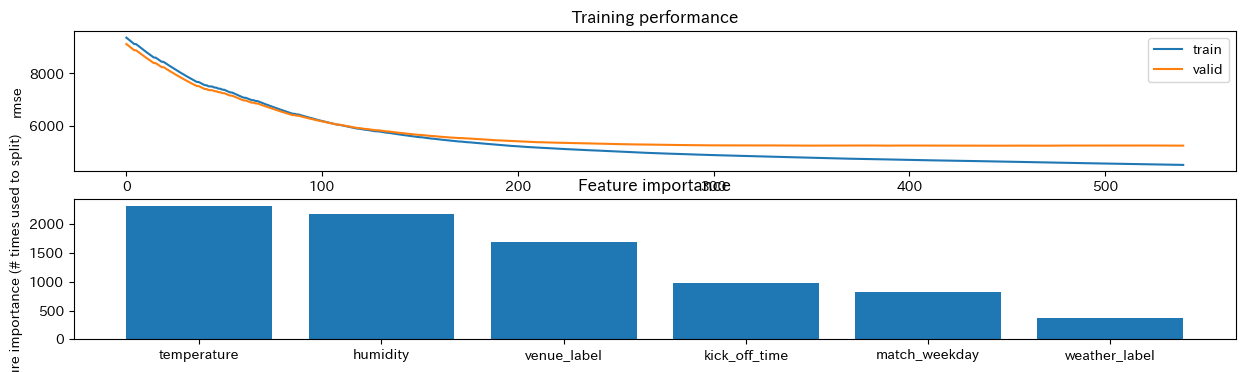

In [16]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# カラム選択
feature_column = ["venue_label", "temperature", "humidity", "weather_label", "kick_off_time", "match_weekday"]

X = train_df[feature_column]
X_test = test_df[feature_column]
y = train_df["attendance"]
object_columns =  X.select_dtypes(include="object").columns
X[object_columns] = X[object_columns].astype("category")
X_test[object_columns] = X_test[object_columns].astype("category")

kf = KFold(n_splits=5, shuffle=True, random_state=777)

params = {
    "objective": "regression",
    "metric": "rmse",
    "num_iterations": 10000,
    "learning_rate": 0.01,
    "num_leaves": 20,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "lambda_l1": 0.1,
    "lambda_l2": 0.1
}

cv_scores = []
feature_importance = pd.DataFrame()
oof_predictions = np.zeros(len(X))
models = []  
eval_result_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}")
    
    evaluation_results = {}
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    train_dataset = lgb.Dataset(X_train, y_train)
    val_dataset = lgb.Dataset(X_val, y_val, reference=train_dataset)
    
    model = lgb.train(
        params=params,
        train_set=train_dataset,
        num_boost_round=1000,
        valid_sets=[train_dataset, val_dataset],
        valid_names=["train", "valid"],
        evals_result=evaluation_results,
        callbacks=[lgb.early_stopping(100)],
        verbose_eval=100
    )
    
    # モデルを保存
    models.append(model)
    
    # 学習結果を保存
    eval_result_list.append(evaluation_results)

    # バリデーションデータの予測
    val_preds = model.predict(X_val)
    oof_predictions[val_idx] = val_preds
    
    # スコアの計算
    fold_score = np.sqrt(mean_squared_error(y_val, val_preds))
    cv_scores.append(fold_score)
    
    
    print(f"Fold {fold} - RMSE: {fold_score}")

# 全体のスコアを計算
print(f"Overall CV RMSE: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# 最も性能の良いモデルを選択
best_model_index = np.argmin(cv_scores)
best_model = models[best_model_index]
evaluation_results = eval_result_list[best_model_index]

print(f"Best model is from fold {best_model_index + 1} with RMSE: {cv_scores[best_model_index]:.4f}")

fig, axs = plt.subplots(2, 1, figsize=[15, 10])

# Plot the log loss during training
axs[0].plot(evaluation_results['train']['rmse'], label='train')
axs[0].plot(evaluation_results['valid']['rmse'], label='valid')
axs[0].set_ylabel('rmse')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': best_model.feature_name(), 
                            'importance': best_model.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')


plt.show()
# テストデータの予測（最も性能の良いモデルを使用）
test_predictions = best_model.predict(X_test, num_iteration=best_model.best_iteration)


# 結果の保存
submission = pd.DataFrame({'id': test_df['id'], 'attendance': test_predictions})
submission.to_csv('../submit_data/submit_2024_06_26_2.csv', index=False, header=False)

TypeError: data type 'categoty' not understood

In [1]:
import pandas as pd

df = pd.read_feather("../features/feature_data/MatchDay_train.feather")
df

,MatchDay
0,2006-03-04
1,2006-03-05
2,2006-03-05
3,2006-03-05
4,2006-03-05
...,...
3667,2017-12-02
3668,2017-12-02
3669,2017-12-02
3670,2017-12-02
